In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
response = requests.get('https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,EMPSZFI,EMPSZFI_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN&for=state:*&key=a1b4b7615d90d9627950d637efc7bc6b20fe4304')

In [3]:
raw_json = response.json()

In [4]:
df = pd.DataFrame(raw_json,columns=raw_json.pop(0))

In [5]:
df

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,EMPSZFI,EMPSZFI_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN,state
0,0400000US28,Mississippi,48-49,Transportation and warehousing,651,Firms with 100 to 249 employees,0,0,0,0,28
1,0400000US28,Mississippi,48-49,Transportation and warehousing,652,Firms with 250 to 499 employees,0,0,0,0,28
2,0400000US28,Mississippi,48-49,Transportation and warehousing,657,Firms with 500 employees or more,176,0,26004,1235464,28
3,0400000US28,Mississippi,44-45,Retail trade,001,All firms,7349,0,147752,3589527,28
4,0400000US28,Mississippi,44-45,Retail trade,611,Firms with no employees,478,0,0,14887,28
...,...,...,...,...,...,...,...,...,...,...,...
10158,0400000US18,Indiana,99,Industries not classified,611,Firms with no employees,83,0,0,2122,18
10159,0400000US18,Indiana,99,Industries not classified,612,Firms with 1 to 4 employees,321,0,489,8956,18
10160,0400000US18,Indiana,99,Industries not classified,620,Firms with 5 to 9 employees,0,0,0,0,18
10161,0400000US18,Indiana,99,Industries not classified,630,Firms with 10 to 19 employees,0,0,0,0,18


In [6]:
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(int)

In [7]:
df['RCPPDEMP'] = df['RCPPDEMP'].astype(int)

In [8]:
df['EMP'] = df['EMP'].astype(int)

In [9]:
df['PAYANN'] = df['PAYANN'].astype(int)

In [10]:
df_trim = df[['NAME','NAICS2017_LABEL','EMPSZFI_LABEL','FIRMPDEMP','RCPPDEMP','EMP','PAYANN']]

In [11]:
df_trim.EMPSZFI_LABEL.value_counts()

All firms                           1070
Firms with 1 to 4 employees         1060
Firms with no employees             1050
Firms with 5 to 9 employees         1042
Firms with 10 to 19 employees       1034
Firms with 20 to 49 employees       1020
Firms with 500 employees or more    1018
Firms with 100 to 249 employees      974
Firms with 50 to 99 employees        966
Firms with 250 to 499 employees      929
Name: EMPSZFI_LABEL, dtype: int64

In [12]:
no_totals = df_trim[df_trim['NAICS2017_LABEL'] != 'Total for all sectors']

In [13]:
no_totals = no_totals[no_totals['EMPSZFI_LABEL'] != 'All firms']

In [14]:
no_totals

,NAME,NAICS2017_LABEL,EMPSZFI_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN
0,Mississippi,Transportation and warehousing,Firms with 100 to 249 employees,0,0,0,0
1,Mississippi,Transportation and warehousing,Firms with 250 to 499 employees,0,0,0,0
2,Mississippi,Transportation and warehousing,Firms with 500 employees or more,176,0,26004,1235464
4,Mississippi,Retail trade,Firms with no employees,478,0,0,14887
5,Mississippi,Retail trade,Firms with 1 to 4 employees,3877,0,8227,187098
...,...,...,...,...,...,...,...
10158,Indiana,Industries not classified,Firms with no employees,83,0,0,2122
10159,Indiana,Industries not classified,Firms with 1 to 4 employees,321,0,489,8956
10160,Indiana,Industries not classified,Firms with 5 to 9 employees,0,0,0,0
10161,Indiana,Industries not classified,Firms with 10 to 19 employees,0,0,0,0


In [15]:
emp_pay = no_totals[['EMP','PAYANN']]

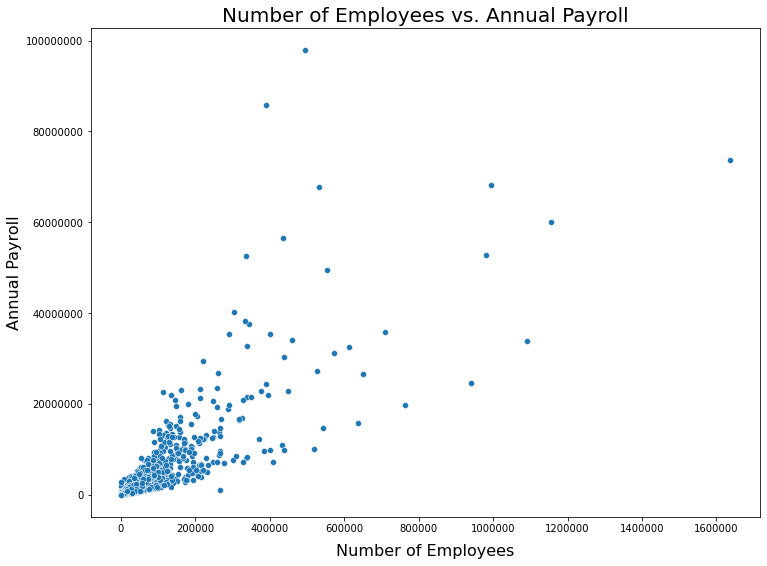

In [25]:
x_vals=emp_pay['EMP']
y_vals=emp_pay['PAYANN']

plt.figure(figsize=(12,9))
ax = sns.scatterplot(x=x_vals,y=y_vals)
ax.set_xlabel('Number of Employees', size=16)
ax.xaxis.labelpad = 10
ax.set_ylabel('Annual Payroll', size=16)
ax.set_title("Number of Employees vs. Annual Payroll", size=20)
ax.ticklabel_format(style='plain')

plt.show()

In [17]:
cat_pay = no_totals[['NAICS2017_LABEL','PAYANN']]

In [25]:
avg_pay_by_cat = cat_pay.groupby('NAICS2017_LABEL').aggregate('mean').reset_index()
avg_pay_by_cat

,NAICS2017_LABEL,PAYANN
0,Accommodation and food services,5.509424e+05
1,Administrative and support and waste managemen...,9.510292e+05
2,"Agriculture, forestry, fishing and hunting",5.907938e+03
3,"Arts, entertainment, and recreation",1.368668e+05
4,Construction,6.800753e+05
5,Educational services,2.844676e+05
6,Finance and insurance,1.293534e+06
7,Health care and social assistance,1.904641e+06
8,Industries not classified,3.340476e+03
9,Information,7.912925e+05


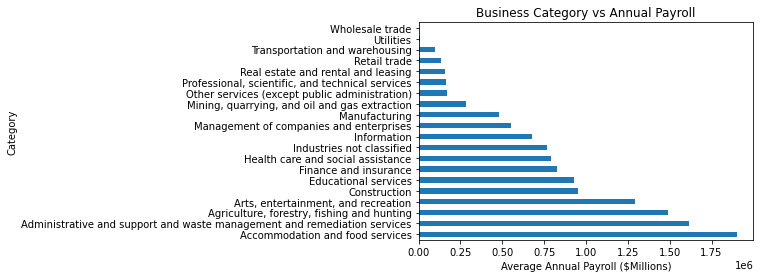

In [33]:
ax = avg_pay_by_cat.sort_values(by='PAYANN',ascending=False).plot.barh(x='NAICS2017_LABEL',y='PAYANN')

x = np.arange(len(avg_pay_by_cat['NAICS2017_LABEL']))

ax.set_xlabel('Average Annual Payroll ($Millions)')
ax.set_title('Business Category vs Annual Payroll')
ax.set_yticks(x)
ax.set_yticklabels(avg_pay_by_cat['NAICS2017_LABEL'])
ax.get_legend().remove()